# 이동평균선

주식 분석 기법은 기본적 분석(fundamental analysis)과 기술적 분석(technical analysis)으로 나눌 수 있습니다. 두 분석 기법은 이론적 입장이 서로 달라 서로 다른 진영의 분석 기법에 대해 종종 비방하기도 합니다. 하지만 분명한 것은 두 분석 기법 모두 의미가 있고 실전에서는 상호 보완적으로 유용하게 활용될 수 있다는 점입니다. 한 예로 많은 사람이 기본적 분석을 통해 투자할 종목을 선정하고 기술적 분석을 통해 매매 시점을 포착하곤 합니다.

초보자들이 가장 처음으로 배우는 기술적 분석지표로 이동평균선이 있습니다. 증권사에 상관없이 HTS에서 5일, 20일, 60일, 120일 이동 평균선이 차트로 제공되고 있으며 시중에 나와 있는 수많은 주식투자서들이 이동평균선에 기반을 두고 매매 시점을 찾는 기법을 소개하고 있습니다.

물론 이동평균선을 활용한 매매법으로 바로 수익을 내는 것은 어려울 수 있지만 이동평균선과 같은 여러 가지 보조 지표를 활용해 새로운 알고리즘을 만드는 데 효과적으로 이용할 수 있을 것입니다. 이번 절에서는 pandas를 이용해 이동평균을 계산하고 이를 차트로 그리는 방법을 배워보겠습니다.

>5일 주가이동평균은, 기준일 이후 5일이 지난 시점부터 구할 수 있다.

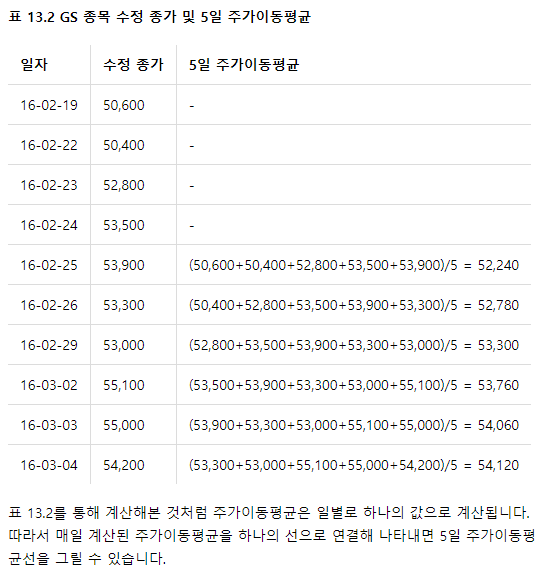

# Pandas를 이용한 주가이동평균 계산

In [1]:
# 주가이동평균을 계산하기 위해 먼저 일자별 데이터를 받아오기
import pandas as pd

In [2]:
import pandas_datareader.data as web

In [3]:
gs = web.DataReader("078930.ks", "yahoo", "2014-01-01", "2016-03-06")

In [4]:
# 데이터 확인
gs.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,44215.894531
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,43667.113281
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,43510.320312
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,43196.734375
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,42569.554688
2014-01-09,54400.0,53600.0,54200.0,54000.0,264952.0,42334.363281
2014-01-10,54500.0,53000.0,54000.0,53300.0,652681.0,41785.585938
2014-01-13,53800.0,53200.0,53300.0,53400.0,165177.0,41863.988281
2014-01-14,53400.0,52500.0,53000.0,53000.0,186179.0,41550.394531


In [5]:
# 수정 종가에 대해 5일 이동 평균을 구하기
moving_avg_5 = gs["Adj Close"].rolling(window=5).mean()

In [6]:
type(moving_avg_5)

pandas.core.series.Series

In [7]:
# 첫 4일은 없고, 5일째부터 이평선을 구할 수 있다.
moving_avg_5.head(10)

Date
2014-01-02             NaN
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08    43431.923438
2014-01-09    43055.617188
2014-01-10    42679.311719
2014-01-13    42350.045312
2014-01-14    42020.777344
2014-01-15    41848.304688
Name: Adj Close, dtype: float64

In [8]:
# 뒤쪽 10개 확인
# 위키독스에선 장 쉬는 날인 3월 1일을 빼주는 기능이 있었으나, 여기선 없음
# 처음 가져올 때부터 3월 1일이 없기 때문!
moving_avg_5.tail(10)

Date
2016-02-19    42007.163281
2016-02-22    42082.012500
2016-02-23    42464.576562
2016-02-24    42946.939063
2016-02-25    43445.934375
2016-02-26    43895.031250
2016-02-29    44327.493750
2016-03-02    44710.058594
2016-03-03    44959.556250
2016-03-04    45009.457031
Name: Adj Close, dtype: float64

In [12]:
# 20일선, 60일선, 120일선을 구하려면?
# rolling(...).mean() 함수의 window 키를 20, 60, 120으로 주면 됨
moving_avg_20 = gs["Adj Close"].rolling(window=20).mean()
moving_avg_20

Date
2014-01-02             NaN
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08             NaN
                  ...     
2016-02-26    42433.389062
2016-02-29    42626.750000
2016-03-02    42867.931641
2016-03-03    43059.213086
2016-03-04    43183.962109
Name: Adj Close, Length: 535, dtype: float64